# Ensemble - Part I
## Bagging and Random Forests

[<font color='#E8800A'>1 - Bagging</font>](#one-bullet) <br>
[<font color='#E8800A'>1.1 - The base estimator</font>](#two-bullet) <br>
[<font color='#E8800A'>1.2 - The number of estimators</font>](#three-bullet) <br>
[<font color='#E8800A'>1.3 - The maximum number of samples</font>](#four-bullet) <br>
[<font color='#E8800A'>1.4 - The maximum number of features </font>](#five-bullet) <br>
[<font color='#E8800A'>1.5 - Bootstrap samples </font>](#six-bullet) <br>
[<font color='#E8800A'>1.6 - Bootstrap features </font>](#seven-bullet)<br>
[<font color='#E8800A'>1.7 - Using Out-of-bag samples </font>](#eight-bullet)<br>
[<font color='#E8800A'>1B - The Pasting Ensemble</font>](#nine-bullet) <br>
[<font color='#E8800A'>1C - The Random Subspaces Ensemble</font>](#ten-bullet) <br>
[<font color='#E8800A'>1D - The Random Patches Ensemble</font>](#eleven-bullet) <br>


[<font color='#E8800A'>2 - Random Forests (EXERCISE) </font>](#twelve-bullet) <br>
[<font color='#E8800A'>2.1 - The number of estimators</font>](#thirteen-bullet) <br>
[<font color='#E8800A'>2.2 - Bootstrap samples </font>](#fifteen-bullet) <br>
[<font color='#E8800A'>2.3 - The maximum number of samples</font>](#sixteen-bullet) <br>
[<font color='#E8800A'>2.4 - The maximum depth of the trees</font>](#seventeen-bullet) <br>
[<font color='#E8800A'>2.5 - Check the feature importante</font>](#eighteen-bullet) <br>
[<font color='#E8800A'>2.6 - Using OOB Score in RF</font>](#nineteen-bullet) <br>

__`Step 1`__ Import all the needed packages. Assign to the object `diabetes` the dataset __diabetes.csv__ and define the independent variables and the target as `X` and `y`, respectively.

In [1]:
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

diabetes = pd.read_csv('diabetes.csv')
X = diabetes.drop(['Outcome'], axis=1)
y = diabetes['Outcome']

np.random.seed(42)

__`Step 2`__ Create an instance of RepeatedStratifiedKFold named as `cv` and define the number of splits equal to 10, the repetitions equal to 3, and the random state equal to 1. This is functionally equivalent to performing 10-fold cross-validation three times, shuffling the data every time before splitting (see [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html)).

In [2]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

__`Step 3`__ Create a function named as `return_f1score` that will receive as parameters a model instance, the independent variables and the target. <br>
This will return the output of a `cross_val_score` from your model, with the scoring defined as f1 and where you apply the RepeatedStratifiedKFold defined in the previous step.

This function will allow us to obtain the f1 score for all the models we are going to create on the notebook, and each model instance is going to be trained for 30 times, using the RepeatedStratifiedKFold.

In [3]:
def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X, y, scoring = 'f1', cv = cv)
    return n_scores

__`Step 4`__ Create a function named as `return_results` that will receive as parameters all the models instances and is going to return the f1 scores from the previous function, and make a boxplot of the results for all the model instances.

In [4]:
def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()

<div class="alert alert-block alert-info">
<a class="anchor" id="one-bullet"> 
    
# 1. Bagging
</a>    
</div>

<div class="alert alert-block alert-info">
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier'>sklearn.ensemble.BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False,...)</a>

__Definition:__ <br>
A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of an estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it. <br>
    
This algorithm encompasses several works from the literature:<br>
* When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting;
* If samples are drawn with replacement, then the method is known as Bagging;
* When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces;
* Finally, when base estimators are built on subsets of both samples and features, then the method is known as Random Patches.
</div>

__`Step 5`__ Import `BaggingClassifier` from `sklearn.ensemble`.

In [5]:
from sklearn.ensemble import BaggingClassifier

### <font color='#E8800A'>base_estimator |</font> <font color='#3a7f8f'>The base estimator to fit on random subsets of the dataset.</font> <a class="anchor" id="two-bullet"></a><br><br>`default = None | DecisionTreeClassifier`

__`Step 6`__ Compare the f1 score for two bagging classifiers: one where the base estimator is a DecisionTreeClassifier and another using a KNN. Compare also with a simple DecisionTreeClassifier and a KNN (without bagging).

Decision Trees are the most common algorithm used in bagging, since they perform well in general and are easy to configure to have a high variance.<br>
Other algorithms can be used. One example is the k-nearest neighbors algorithm where the k-value can be set to a low value in order to maximize variance.

>DecisionTreeClassifier() 0.573 (0.080)
>DecisionTreeClassifier()_bagging 0.583 (0.062)
>KNeighborsClassifier() 0.562 (0.064)
>KNeighborsClassifier()_bagging 0.568 (0.071)


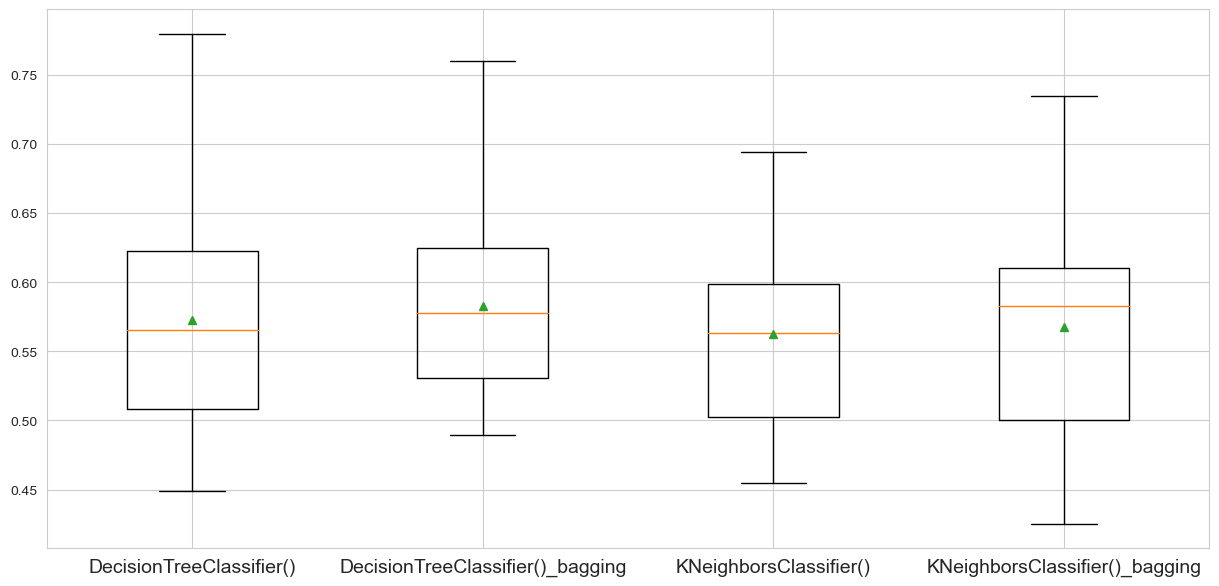

In [6]:
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

def get_models(*args):
    models = dict()
    for arg in args:
        models[str(arg)] = arg
        models[str(arg) + '_bagging'] = BaggingClassifier(estimator = arg, random_state = 15)      
    return models

models = get_models(dt, knn)
return_results(models)

In this case, we can see that the performance of the baggings are better compared to use just one simple model.
- A bagging of Decision Trees will achieve a f1 score of 0.583, while a single Decision Tree achieves 0.569;
- A bagging of KNNs achieve a f1 score of 0.568, while a single KNN achieves 0.562;

The best model from the 4 experiments is the bagging with Decision Trees.

### <font color='#E8800A'>n_estimators |</font> <font color='#3a7f8f'>The number of base estimators in the ensemble.</font> <a class="anchor" id="three-bullet"></a><br><br>`default = 10`

__`Step 7`__ By deafult, we use 10 models in bagging. Check what is the f1 score for different quantities of estimators, namely 2,5,10,20,30,50 and 100 by changing the parameter `n_estimators`.

>2 0.462 (0.074)
>5 0.584 (0.056)
>10 0.583 (0.062)
>20 0.604 (0.063)
>30 0.614 (0.059)
>50 0.627 (0.068)
>100 0.640 (0.069)
>150 0.633 (0.077)
>200 0.638 (0.080)


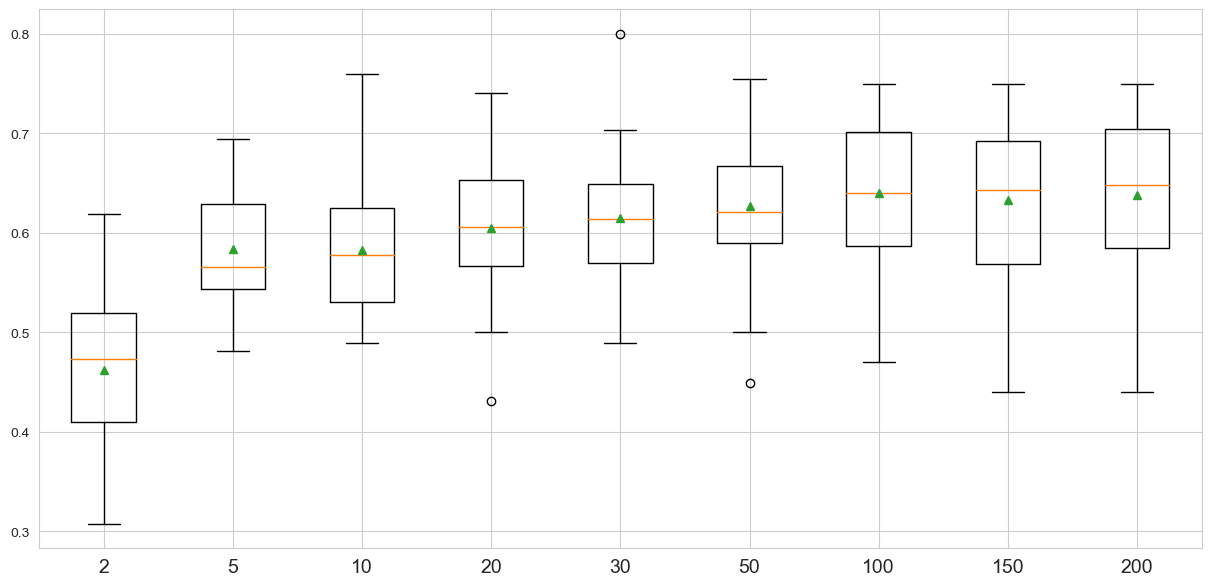

In [7]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = BaggingClassifier(n_estimators = value, random_state = 15)      
    return models

models = get_models([2,5,10,20,30,50,100,150,200])
return_results(models)

Tipically, the number of trees is increased until the model performance stabilizes.

In this case, the results suggest that increasing the number of estimators on the bagging seems to improve our model's performance. With only two decision trees as estimators, we achieve an f1 score of 0.462, and there is a rise in the performance if we add more estimators to the bagging. <br>
However, adding more than 100 estimators seem to have the opposite effect.

### <font color='#E8800A'>max_samples |</font> <font color='#3a7f8f'>The number of samples to draw from X to train each base estimator (with replacement by default)</font> <a class="anchor" id="four-bullet"></a><br><br>`default = 1.0`

__`Step 8`__ Change the number of samples used to fit each decision tree via the `max_samples` argument. Test with 10%, 20%, 40%, 60%, 80% and 100% the size of the training data.

>0.1 0.580 (0.079)
>0.2 0.602 (0.066)
>0.4 0.591 (0.067)
>0.6 0.587 (0.070)
>0.8 0.589 (0.078)
>1.0 0.583 (0.062)


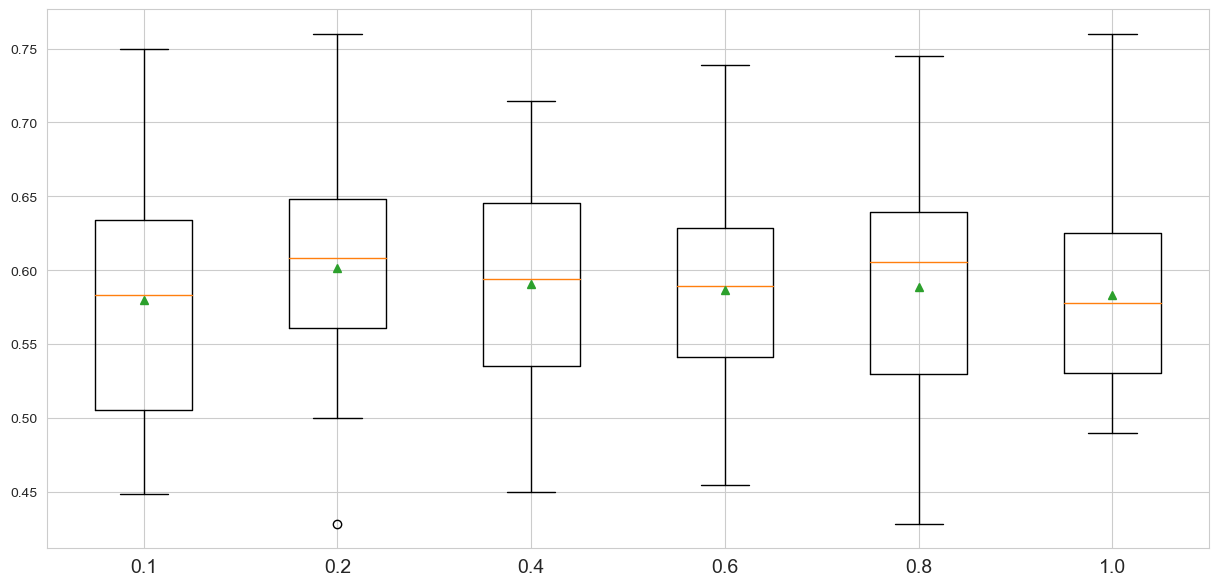

In [8]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = BaggingClassifier(max_samples = value, random_state = 15)      
    return models

models = get_models([0.1,0.2,0.4,0.6,0.8,1.0])
return_results(models)

By default, sklearn creates a bootstrap sample that has the same number of examples as the original dataset. Using a smaller dataset can increase the variance of the resulting decision trees and can result in better overall performance. <br>
In this case, we can verify that using 20% the size of the training data is the value that gives us the best results, for all the tested values.

### <font color='#E8800A'>max_features |</font> <font color='#3a7f8f'>The number of features to draw from X to train each base estimator ( without replacement by default)</font> <a class="anchor" id="five-bullet"></a><br><br>`default = 1.0`

__`Step 9`__ Change the number of features used to fit each decision tree via the `max_features` argument. Test with 10%, 20%, 40%, 60%, 80% and 100% the number of features available in the training data.

>0.1 0.361 (0.070)
>0.2 0.361 (0.070)
>0.4 0.470 (0.076)
>0.6 0.521 (0.076)
>0.8 0.545 (0.084)
>1.0 0.583 (0.062)


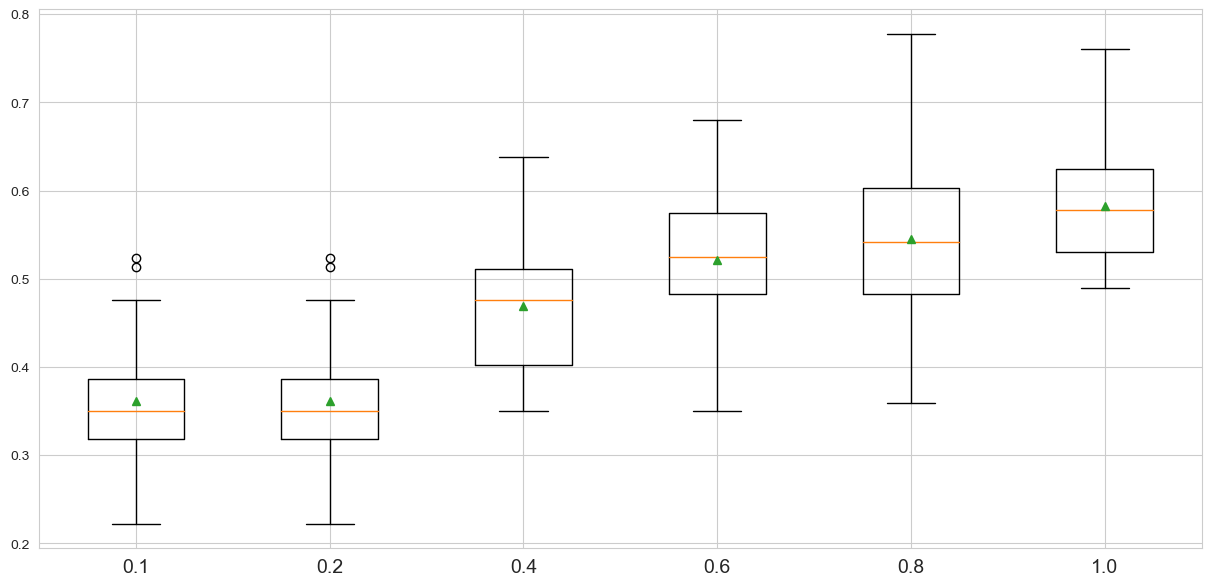

In [9]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = BaggingClassifier(max_features = value, random_state = 15)      
    return models

models = get_models([0.1,0.2,0.4,0.6,0.8,1.0])
return_results(models)

In this case, we can see that the number of variables introduced in the fitting is important to achieve a better performance. The higher, the better.

### <font color='#E8800A'>bootstrap |</font> <font color='#3a7f8f'>Whether samples are drawn with replacement. If False, sampling without replacement is performed.</font> <a class="anchor" id="six-bullet"></a><br><br>`default = True`

__`Step 10`__ Check if bootstrap equal to True (the default) is better or worst than not applying bootstrap.

>True 0.583 (0.062)
>False 0.565 (0.094)


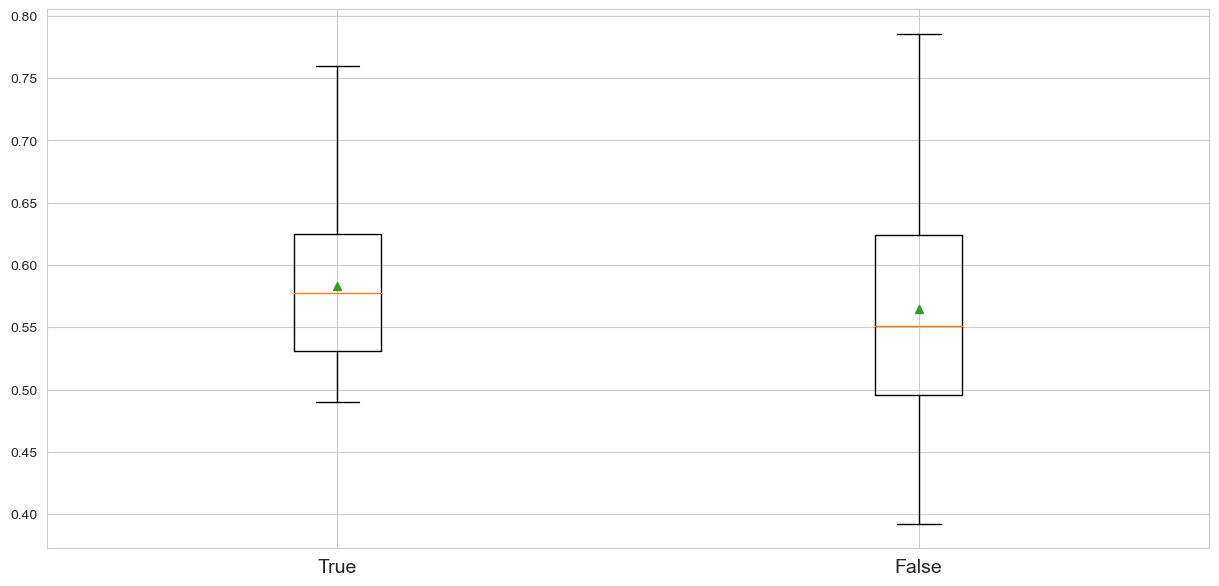

In [10]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = BaggingClassifier(bootstrap = value, random_state = 15)      
    return models

models = get_models([True, False])
return_results(models)

In this case, we can verify that bootstrap is important to our problem, and if samples are drawn with replacement we achieve a better performance.

### <font color='#E8800A'>bootstrap_features |</font> <font color='#3a7f8f'>Whether features are drawn with replacement.</font> <a class="anchor" id="seven-bullet"></a><br><br>`default = False`

__`Step 11`__ You can also apply bootstrap to the features. In that case, features are drawn with replacement. By default is False. Compare both results.

>True 0.561 (0.075)
>False 0.583 (0.062)


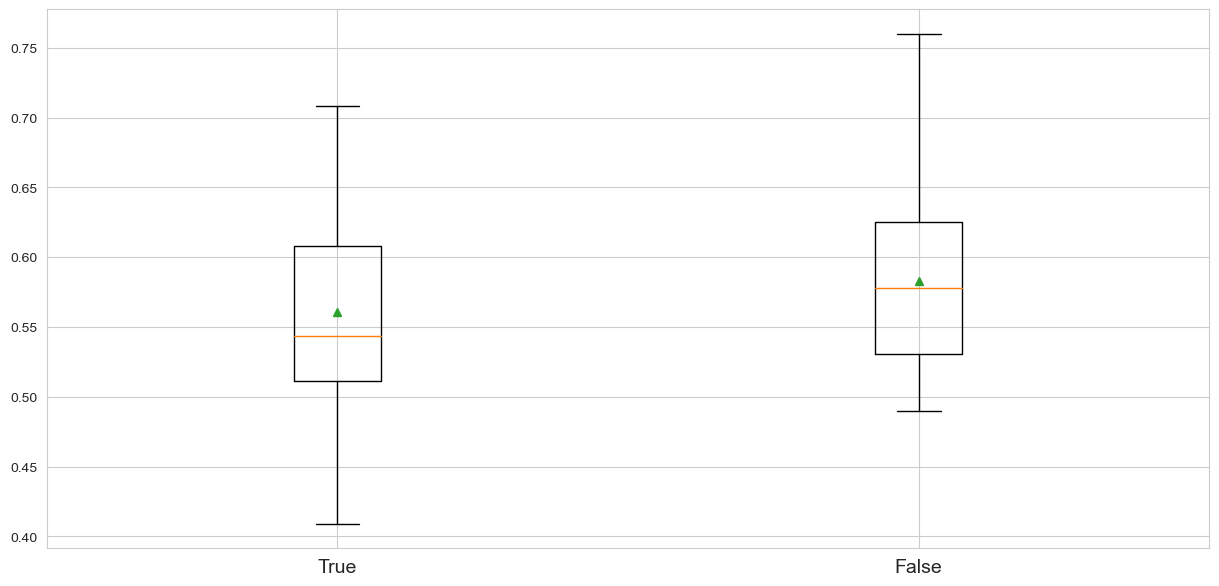

In [11]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = BaggingClassifier(bootstrap_features = value, random_state = 15)      
    return models

models = get_models([True, False])
return_results(models)

By the results we can verify that drawn features with replacement can lead to worst results.

### <font color='#E8800A'>oob_score |</font> <font color='#3a7f8f'>Whether to use out-of-bag samples to estimate the generalization error. Only available if bootstrap=True.</font> <a class="anchor" id="eight-bullet"></a><br><br>`default = False`


#### Out-of-Bag Scoring
If we are using bagging, there’s a chance that a sample would never be selected, while anothers may be selected multiple times. The probability of not selecting a specific sample is (1–1/n), where n is the number of samples. Therefore, the probability of not picking n samples in n draws is (1–1/n)^n. When the value of n is big, we can approximate this probability to 1/e, which is approximately 0.3678. This means that when the dataset is big enough, 37% of its samples are never selected and we could use it to test our model. This is called Out-of-Bag scoring, or OOB Scoring.

Source: https://medium.com/@juniormiranda_23768/ensemble-methods-bagging-and-pasting-in-scikit-learn-723f4183cdf4


#### Advantages of using OOB_Score:
- __No leakage of data:__ Since the model is validated on the OOB Sample, which means data hasn’t been used while training the model in any way, so there isn’t any leakage of data and henceforth ensures a better predictive model. <br>
- __Less Variance :__  [More Variance ~ Overfitting]. Since OOB_Score ensures no leakage, so there is no overfitting of the data and hence least variance. <br>
- __Better Predictive Model:__ OOB_Score helps in the least variance and hence it makes a much better predictive model than a model using other validation techniques. <br>
- __Less Computation:__ It requires less computation as it allows one to test the data as it is being trained.<br>
    
#### Disadvantages of using OOB_Error :
- __Time Consuming:__  The method allows to test the data as it is being trained, but the overall process is a bit time-consuming as compared to other validation techniques. <br>
- __Not good for Large Datasets:__ As the process can be a bit time-consuming in comparison with the other techniques, so if the data size is huge, it may take a lot more time while training the model.<br>
- __Best for Small and medium-size datasets:__ Even if the process is time-consuming, but if the dataset is medium or small sized, OOB_Score should be preferred over other techniques for a much better predictive model.<br>

Source: https://www.analyticsvidhya.com/blog/2020/12/out-of-bag-oob-score-in-the-random-forest-algorithm/

In this exercise we are going to check the performance of our models using `oob_score = True`, i.e., using the concept of out-of-bag samples. In this way, you do not need to split your dataset into train and validation since when using sample with `bootstrap = True` some of the samples are not used to fit your model and those can be used for validation.

__`Step 12`__ Create a dictionary where you define three different models. The key of each element is going to be the name of the model and the value the are the instances of those models.
- Create a Bagging Classifier where `oob_score = True`, `max_samples = '0.3'` and `random_state = 15`. Name that model instance as `"RF, max_samples='0.3'"` 
- Create a Bagging Classifier where `oob_score = True`, `max_samples = '0.5'` and `random_state = 15`. Name that model instance as `"RF, max_samples='0.5'"` 
- Create a Bagging Classifier where `oob_score = True`, `max_samples = '1.0'` and `random_state = 15`. Name that model instance as `"RF, max_samples=1.0"` 

In [12]:
ensemble_clfs = {
    "Bagging, max_samples=0.3": BaggingClassifier(oob_score=True, max_samples=0.3, random_state=15),
    "Bagging, max_samples=0.5": BaggingClassifier(oob_score=True, max_samples=0.5, random_state=15),
    "Bagging, max_samples=1.0": BaggingClassifier(oob_score=True, max_samples=1.0, random_state=15),
}

__`Step 13`__ Assign the value of 50 to a variable named as `min_estimators` and 120 to a variable named as `max_estimators`. These will define the range of estimators to test it on during the creation of our Bagging Classifiers. 

In [13]:
# Range of `n_estimators` values to explore.
min_estimators = 50
max_estimators = 120

__`Step 14`__ For each instance that you defined in step 12, define `n_estimators` to all the values in the range between [min_estimators, max_estimators] and fit to your full data set. Record the OOB error for each `n_estimators = i`, for each instance defined in step 12.

In [14]:
error_rate = dict((label, []) for label in ensemble_clfs)
for label, clf in ensemble_clfs.items():
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

__`Step 15`__ Make the plot of the errors for the different model instances, where `n_estimators`and `max_samples` change.

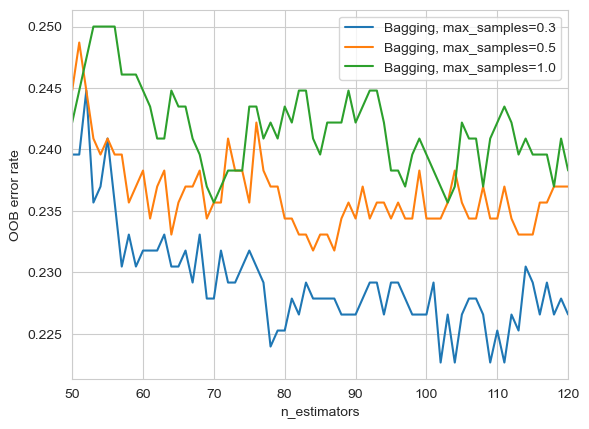

In [15]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

<div class="alert alert-block alert-warning">
<a class="anchor" id="nine-bullet"> 
    
# 1B. The Pasting Ensemble
### when `bootstrap = False` and `max_samples` is smaller than 1.0

</a>    
</div>

The pasting ensemble is an extension to bagging where you define random samples of the training dataset instead of bootstrap samples. In that case, `bootstrap = False`, and you define a smaller value than 1.0 in `max_samples`. 

__`Step 16`__  Change the number of samples used to fit each decision tree via the `max_samples` argument. Test with 10%, 20%, 40%, 60%, 80% and 100% the size of the training data, but this time with `bootstrap = False`.

>0.1 0.575 (0.080)
>0.2 0.585 (0.079)
>0.4 0.610 (0.075)
>0.6 0.591 (0.064)
>0.8 0.594 (0.074)
>1.0 0.565 (0.094)


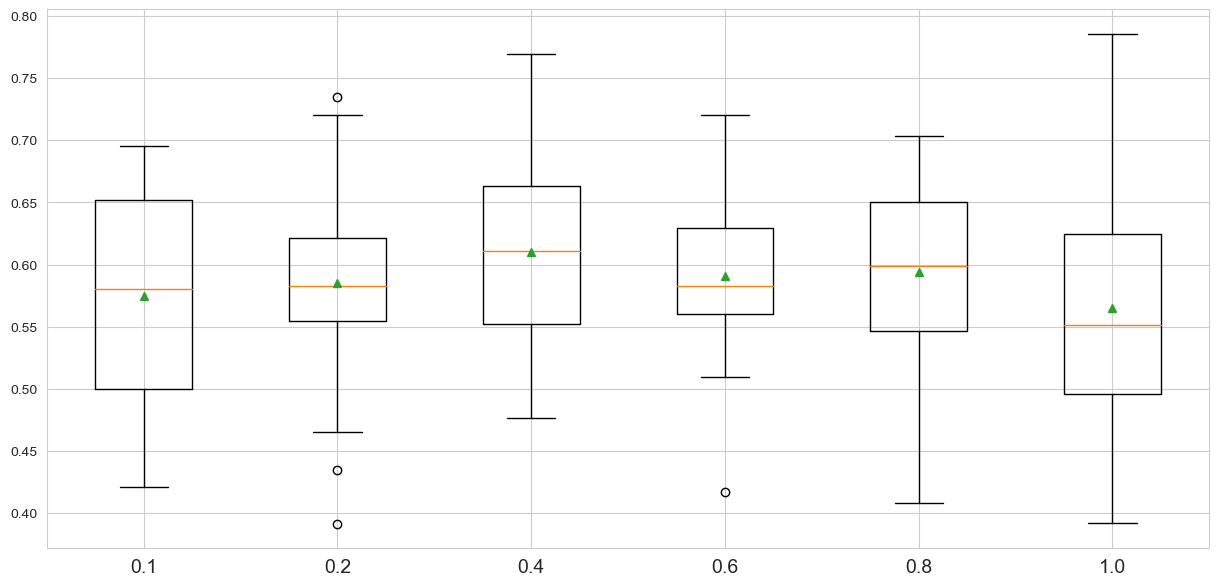

In [16]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = BaggingClassifier(bootstrap = False, max_samples = value, random_state = 15)      
    return models

models = get_models([0.1,0.2,0.4,0.6,0.8,1.0])
return_results(models)

We already knew from `Step 8` that using a smaller dataset can increase the variance of the resulting decision trees and can result in better overall performance. <br>
In this case, where you don't drawn samples with replacement, since `bootstrap = False`, we can verify that using 40% the size of the training data is the value that gives us the best results, for all the tested values, and we achieve a better performance than the best result achieved in `Step 8`, where using 20% of the size of the trainign data gave us 0.602.

<div class="alert alert-block alert-warning">
<a class="anchor" id="ten-bullet"> 
    
# 1C. The Random Subspaces Ensemble
### when `bootstrap = False` and `max_features` is smaller than 1.0
</a>    
</div>

The random subspaces ensemble is an extension to bagging where you define random features of the training dataset instead of bootstrap samples. In that case, `boostrasp = False`, and you define a smaller value than 1.0 in `max_features`. 

__`Step 17`__  Change the number of features used to fit each decision tree via the `max_features` argument. Test with 10%, 20%, 40%, 60%, 80% and 100% the size of the training data, but this time with `bootstrap = False`.

>0.1 0.355 (0.097)
>0.2 0.355 (0.097)
>0.4 0.473 (0.088)
>0.6 0.534 (0.094)
>0.8 0.528 (0.086)
>1.0 0.565 (0.094)


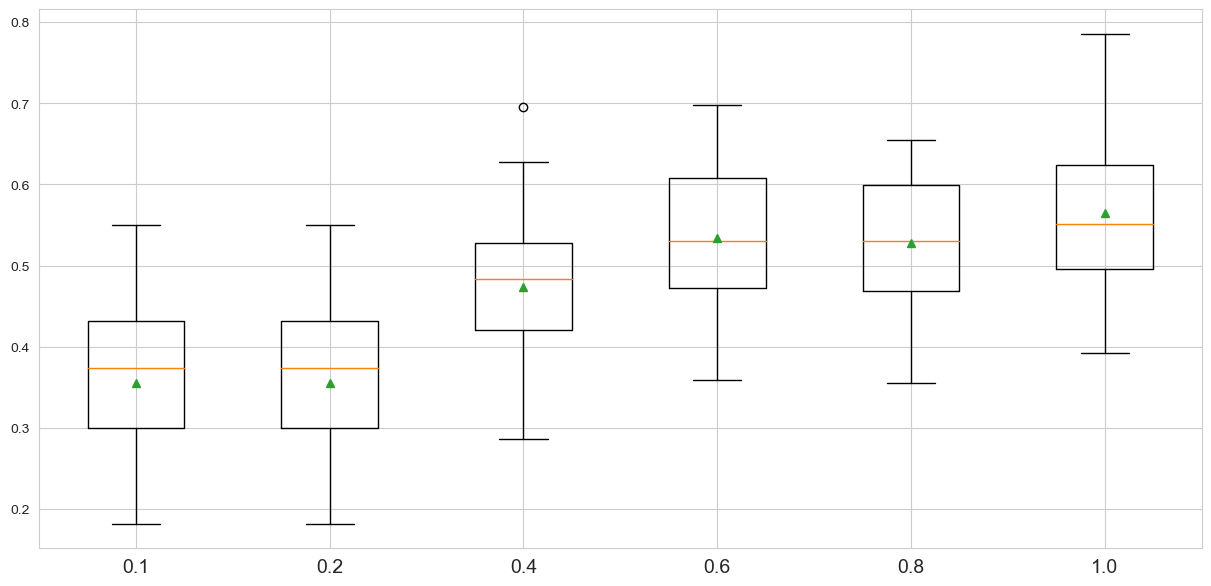

In [17]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = BaggingClassifier(bootstrap = False, max_features = value, random_state = 15)      
    return models

models = get_models([0.1,0.2,0.4,0.6,0.8,1.0])
return_results(models)

In this case, we can see that using Random Subspace ensemble is not a good approach, since we are not even able to achieve a performance of 0.6 for the different tested values.

<div class="alert alert-block alert-warning">
<a class="anchor" id="eleven-bullet"> 
    
# 1D. The Random Patches Ensemble
### when `bootstrap = False`, `max_features` is smaller than 1.0 and `max_samples` is smaller than 1.0
</a>    
</div>

The random patches ensemble is an extension to bagging that involves fitting ensemble members based on datasets constructed from random subsets of rows and columns of the training dataset. In that case, `bootsrap = False`, and you define a smaller value than 1.0 in `max_features` and in `max_samples`. 

__`Step 18`__  Change the number of features and the number of samples used to fit each decision tree via the `max_features` and the `max_samples` argument. Test with 50% and 90% the size of the training data (for rows and columns), with `bootstrap = False`.

>0.5_feat and 0.5_samp 0.486 (0.091)
>0.5_feat and 0.9_samp 0.487 (0.079)
>0.9_feat and 0.5_samp 0.584 (0.082)
>0.9_feat and 0.9_samp 0.561 (0.085)


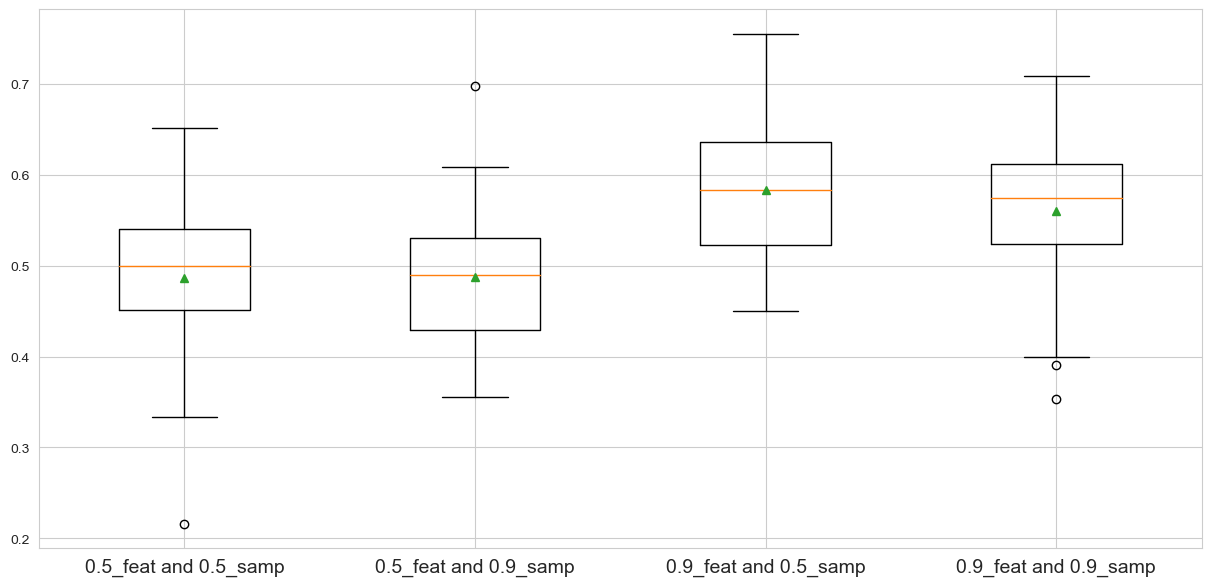

In [18]:
def get_models(value_features, value_samples):
    models = dict()
    for value in value_features:
        for value_s in value_samples:
            models[str(value) + '_feat and ' + str(value_s) + '_samp'] = BaggingClassifier(bootstrap = False, max_features = value, max_samples = value_s, random_state = 15)      
    return models

models = get_models([0.5,0.9], [0.5,0.9])
return_results(models)

<div class="alert alert-block alert-info">
<a class="anchor" id="twelve-bullet"> 
    
# 2. Random Forests (EXERCISE)
</a>    
</div>

### In theory: 
1. Random Forest works similar to bagging except for the fact that not all features(independent variables) are selected in a subset
    - Note1: In sklearn you can define also the number of features in bagging, so in practice you are applying Random Forests in step 9 if you are using a value of max_features lower than 1.0;
    - Note2: In sklearn, the RandomForests can also include all of the features if max_features = None. By default, the max_features applied in RandomForests is the sqrt(n_features). <br><br>

2. Random Forest works only with Decision Trees, Whereat in bagging any algorithm can be used. <br><br>

3. In bagging the subsets differ from original data only in terms of number of rows but in Random forest the subsets differ from the original data both in terms of number of rows as well as number of columns.
    - Note: As mentioned previously, in sklearn you can also define the number of features in bagging.

__`Step 19`__  From sklearn.ensemble import RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

### <font color='#E8800A'>n_estimators |</font> <font color='#3a7f8f'>The number of trees in the forest.</font> <a class="anchor" id="thirteen-bullet"></a><br><br>`default = 100`

__`Step 20`__ By default, we use 100 trees in Random Forests. Check what is the f1 score for different quantities of estimators, namely 10,20,50,100, 200 and 300 by changing the parameter `n_estimators`. Adjust the function get_models to this purpose and get the boxplots, the mean and the standard deviation of f1 score for all options.

>10 0.582 (0.072)
>20 0.601 (0.073)
>50 0.628 (0.072)
>100 0.626 (0.076)
>200 0.635 (0.076)
>300 0.639 (0.078)


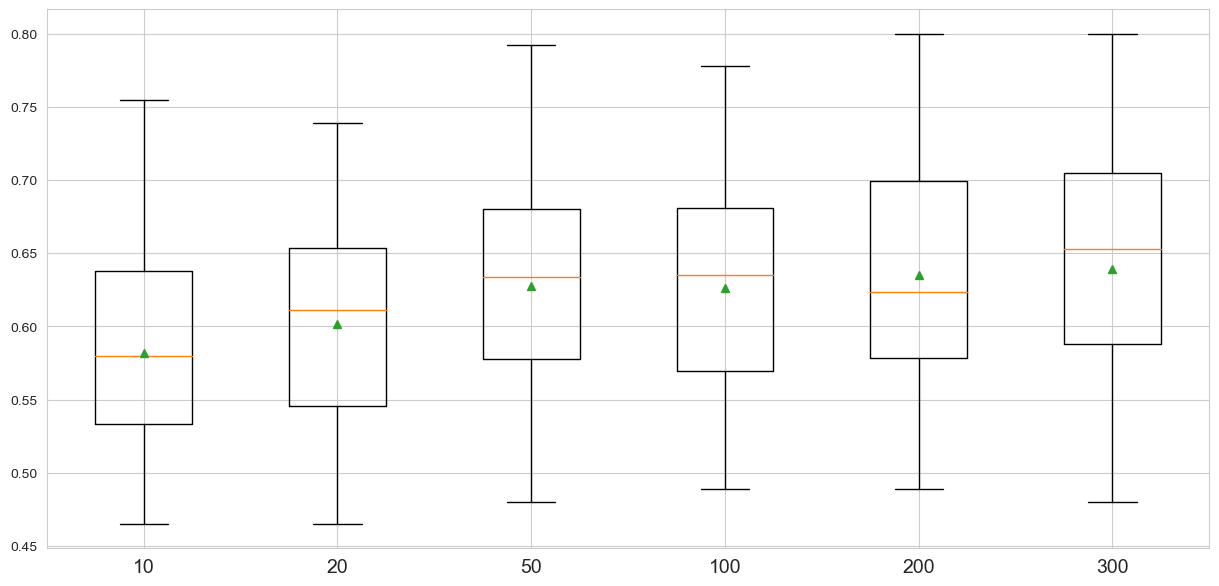

In [21]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(n_estimators = value, random_state = 15)      
    return models

models = get_models([10,20,50,100,200,300])
return_results(models)

### <font color='#E8800A'>bootstrap |</font> <font color='#3a7f8f'>Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.</font> <a class="anchor" id="fifteen-bullet"></a><br><br>`default = True`

__`Step 22`__ Check if bootstrap equal to True (the default) is better or worst than not applying bootstrap.

>True 0.626 (0.076)
>False 0.629 (0.073)


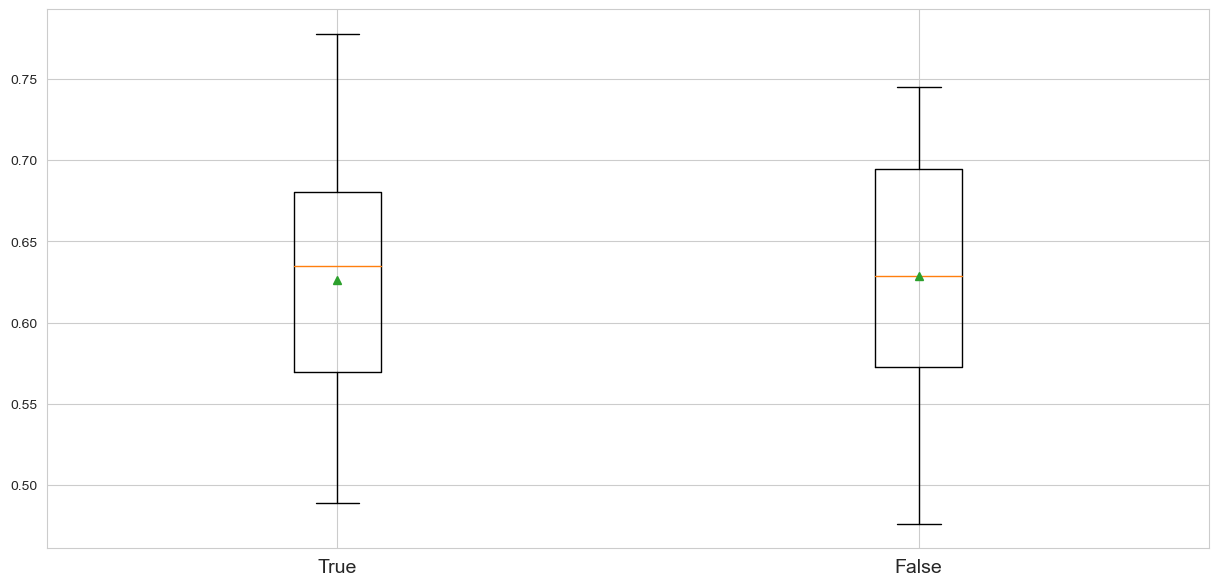

In [22]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(bootstrap = value, random_state = 15)      
    return models

models = get_models([True, False])
return_results(models)

### <font color='#E8800A'>max_samples |</font> <font color='#3a7f8f'>If bootstrap is True, the number of samples to draw from X to train each base estimator.</font> <a class="anchor" id="sixteen-bullet"></a><br><br>`default = None | X.shape[0] samples`


__`Step 23`__ Change the number of samples used to fit each decision tree via the `max_samples` argument. Test with 20%, 40%, 60%, 80%  the size of the training data, and 'None', that is equal to the number of samples of the training data.

>0.2 0.627 (0.078)
>0.4 0.625 (0.087)
>0.6 0.632 (0.061)
>0.8 0.636 (0.072)
>None 0.626 (0.076)


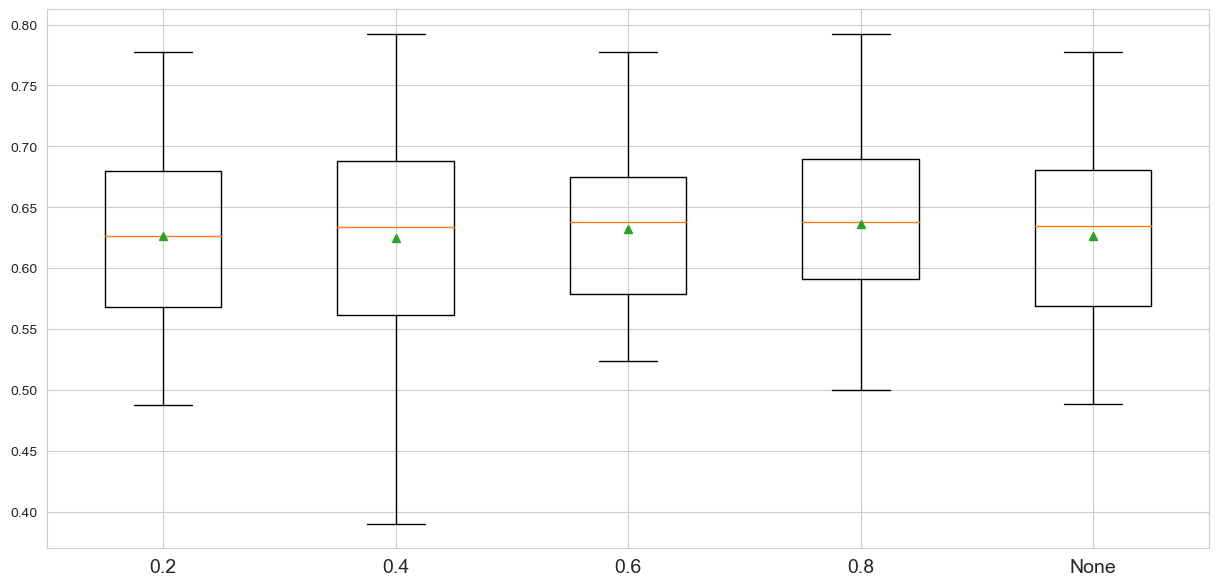

In [23]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(max_samples = value, random_state = 15)      
    return models

models = get_models([0.2,0.4,0.6,0.8,None])
return_results(models)

### <font color='#E8800A'>max_depth |</font> <font color='#3a7f8f'>The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.</font> <a class="anchor" id="seventeen-bullet"></a><br><br>`default = None`

__`Step 24`__ Several parameters that we saw in the classes of Decision Trees can also be configured in random forests, such as the maximum depth of a tree. Try the options [1,2,4,6,8,10,None] in `max_depth`, that will change the depth of the decision trees used in the ensemble.

>1 0.231 (0.095)
>2 0.493 (0.102)
>4 0.599 (0.086)
>6 0.626 (0.074)
>8 0.627 (0.073)
>10 0.627 (0.075)
>None 0.626 (0.076)


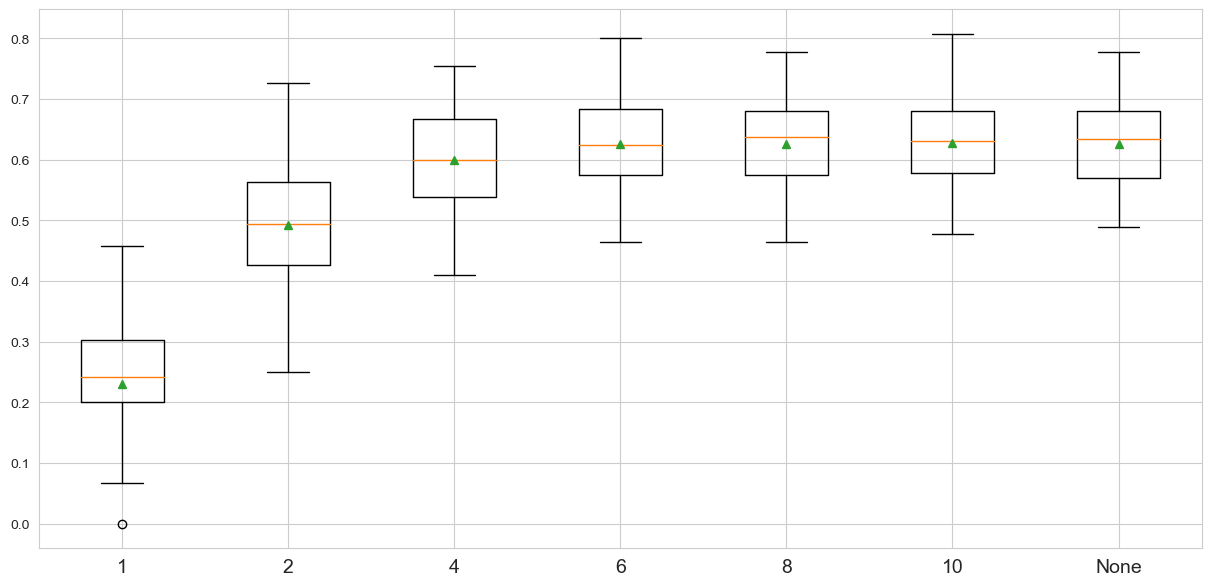

In [25]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(max_depth = value, random_state = 15)      
    return models

models = get_models([1,2,4,6,8,10,None])
return_results(models)

<a class="anchor" id="eighteen-bullet">

### Check the feature importance of the variables
</a>

__`Step 25`__ You can also use the attribute `feature_importances_`in random forests to evaluate the importance of each variable to define the target. Split your data set using train_test_split, and create an unique model, where `n_estimators = 300`, and `random_sate = 15`. Check the feature importances for each independent variable.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)
rf = RandomForestClassifier(n_estimators = 300, random_state = 15)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.08730509, 0.26593841, 0.09015158, 0.06530439, 0.06014512,
       0.16365246, 0.12212938, 0.14537358])

<a class="anchor" id="nineteen-bullet">

### Apply out-of-bag samples
</a>

In this exercise we are going to check the performance of our models using `oob_score = True`, i.e., using the concept of out-of-bag samples. In this way, you do not need to split your dataset into train and validation since when using sample with `bootstrap = True` some of the samples are not used to fit your model and those can be used for validation.

__`Step 26`__ Create a dictionary where you define three different models. The key of each element is going to be the name of the model and the value the are the instances of those models.
- Create a Random Forest Classifier where `oob_score = True`, `max_features = 'sqrt'` and `random_state = 15`. Name that model instance as `"RF, max_features='sqrt'"` 
- Create a Random Forest Classifier where `oob_score = True`, `max_features = 'log2'` and `random_state = 15`. Name that model instance as `"RF, max_features='log2'"` 
- Create a Random Forest Classifier where `oob_score = True`, `max_features = 'None'` and `random_state = 15`. Name that model instance as `"RF, max_features=None"` 

In [27]:
ensemble_clfs = {
    "RF, max_features='sqrt'": RandomForestClassifier(oob_score=True, max_features='sqrt', random_state=15),
    "RF, max_features='log2'": RandomForestClassifier(oob_score=True, max_features='log2', random_state=15),
    "RF, max_features=None": RandomForestClassifier(oob_score=True, max_features=None, random_state=15),
}

__`Step 27`__ Assign the value of 100 to a variable named as `min_estimators` and 200 to a variable named as `max_estimators`. These will define the range of estimators to test it on during the creation of our Random Forests. 

__`Step 28`__ For each instance that you defined in step 26, define `n_estimators` to all the values in the range between [min_estimators, max_estimators] and fit to your full data set. Record the OOB error for each `n_estimators = i`, for each instance defined in step 26. (Similar to step 14)

__`Step 29`__ Make the plot of the errors for the different model instances, where `n_estimators`and `max_features` change.(Similar to step 15).